# Games Analysis

## Read the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/all_games_final.csv")
df

,White,WhiteElo,Result,Black,BlackElo,TimeControl,Date_clean,StartTime,CurrentPosition,Termination,mainline_moves
0,Rizxtar,1537,1-0,snAp_freAk,1246,2m+1s,2024-02-03,07:37:10,6k1/pp3pp1/1b2p3/3B4/8/8/PP4PP/4RK1R b - -,Rizxtar won by resignation,1. d4 d5 2. c4 c6 3. Nc3 Bf5 4. f3 e6 5. e4 Bg...
1,nebpetrovic,1619,0-1,snAp_freAk,1681,10m,2024-02-05,08:05:58,8/1r6/3R1p2/3K1kp1/3P4/2r5/8/8 w - -,snAp_freAk won by resignation,1. b4 d5 2. a4 Bf5 3. Bb2 c6 4. e3 e6 5. b5 Nf...
2,Mgr2050,1672,0-1,snAp_freAk,1718,10m,2024-02-05,08:29:03,2rq1rk1/pp1n1ppp/2n1p2B/3pPb2/1P1P3b/P7/3NBPPP...,snAp_freAk won by resignation,1. e4 c6 2. d4 d5 3. e5 Bf5 4. c3 e6 5. Nf3 Nd...
3,Vivek2810N,1712,1-0,snAp_freAk,1653,10m,2024-02-05,12:08:42,3Q2k1/p2n1ppp/8/1pr5/8/4P2P/Pb1PB3/3K2R1 b - -,Vivek2810N won by resignation,1. e3 c6 2. b3 d5 3. g3 Bf5 4. Bb2 e6 5. Bg2 N...
4,mohcineee13,1641,1-0,snAp_freAk,1650,10m,2024-02-05,12:29:57,3R2k1/2r2ppp/2q5/p3PbB1/Pp6/1B5P/1PP1Q3/2K5 b - -,mohcineee13 won by resignation,1. e4 c6 2. Bc4 d5 3. exd5 cxd5 4. Bb5+ Nc6 5....
...,...,...,...,...,...,...,...,...,...,...,...
4460,snAp_freAk,1290,1-0,a230796,971,10m,2017-09-29,13:28:32,1R3b1r/p1pkqp2/2Bp2p1/7p/2Q5/2P1B3/P1P2PPP/4K2...,snAp_freAk won by checkmate,1. e4 e5 2. Nc3 Nc6 3. Nf3 Nf6 4. Bb5 Qe7 5. d...
4461,snAp_freAk,1255,1-0,826516565,1273,10m,2017-09-29,16:44:36,8/8/1p4r1/1P1R2P1/3R4/P4k2/1K6/8 b - -,snAp_freAk won by resignation,1. e4 c6 2. Nc3 e5 3. Nf3 Na6 4. Nxe5 Nc7 5. B...
4462,snAp_freAk,1235,0-1,abdo15987,1363,10m,2017-09-29,17:04:55,8/p4pkp/n3p1p1/6P1/1p6/2n5/2K1b3/3r4 w - -,abdo15987 won by resignation,1. e4 e6 2. Nc3 d5 3. d3 Bb4 4. Nf3 dxe4 5. dx...
4463,snAp_freAk,1238,1-0,pauljohnbani,1171,10m,2017-09-30,17:58:48,r5k1/pp3ppp/2p5/8/B3P3/1P6/P1q1r1PP/3R1RK1 b - -,snAp_freAk won on time,1. e4 e5 2. d3 Nc6 3. Nc3 Bc5 4. Nf3 Nf6 5. Be...


## Code that alows iterating over games

In [3]:
df_selection = df[['White', 'WhiteElo', 'Result', 'Black', 'BlackElo', 'Date_clean', 'StartTime', 'Termination', 'mainline_moves']]
df_ordered = df_selection.sort_values(by=['Date_clean', 'StartTime'], ascending=[False, False])

df_game_info = df_ordered[['White', 'WhiteElo', 'Result', 'Black', 'BlackElo']].reset_index(drop=True)
df_game_info[['WhiteElo', 'BlackElo']] = df[['WhiteElo', 'BlackElo']].astype(str)
df_term_moves = df_ordered[['Termination', 'mainline_moves']].reset_index(drop=True)

df_game_info_list = df_game_info.values.tolist()

game_info_cleaned = []
for game in df_game_info_list:
    game_string = f'{game[0]}({game[1]})  vs  {game[3]}({game[4]})  :  {game[2]}'
    game_info_cleaned.append(game_string)

df_term_moves

,Termination,mainline_moves
0,snAp_freAk won by checkmate,1. d4 Nf6 2. Bf4 e6 3. Nf3 d5 4. e3 c5 5. c3 c...
1,mohcineee13 won by resignation,1. e4 c6 2. Bc4 d5 3. exd5 cxd5 4. Bb5+ Nc6 5....
2,snAp_freAk won by checkmate,1. d4 Nf6 2. Bf4 d5 3. Nf3 Nc6 4. e3 Bg4 5. Nb...
3,Vivek2810N won by resignation,1. e3 c6 2. b3 d5 3. g3 Bf5 4. Bb2 e6 5. Bg2 N...
4,Adler-Homs won by resignation,1. d4 d5 2. Bf4 Bf5 3. Nf3 Nf6 4. e3 e6 5. Nh4...
...,...,...
4460,snAp_freAk won - game abandoned,1. e4 c5 2. f3 Nc6 3. Nc3 e5 4. d3 Nd4 5. Nb5 ...
4461,snAp_freAk won by checkmate,1. e4 e5 2. f3 d6 3. Nc3 Nf6 4. Nh3 Nc6 5. d3 ...
4462,RFishy won by checkmate,1. e4 e5 2. Nf3 d6 3. d4 Nc6 4. c3 exd4 5. Nxd...
4463,snAp_freAk won by resignation,1. e4 Nf6 2. f3 e5 3. Nc3 Bc5 4. d3 Bxg1 5. Rx...


## Importing custom chess analysis board from custom_chess.py
This way we have tool to manualy review specific game

In [4]:
from custom_chess import ChessGame, UI

In [5]:
game = ChessGame('snAp_freAk', df_term_moves, df_game_info)
ui = UI('snAp_freAk', game, game_info_cleaned)

Label(value='Dragon1419')

Label(value='snAp_freAk')

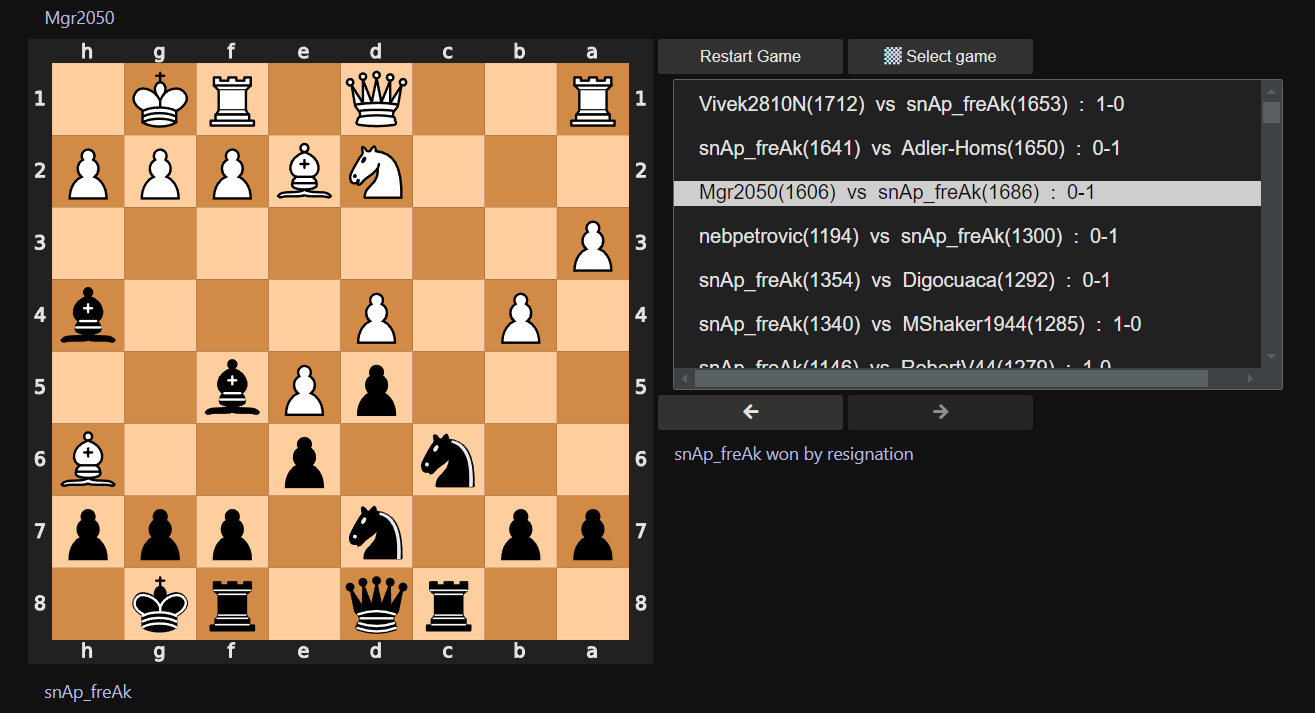

In [8]:
# Uploading screenshot of above output so it can be visible in GitHub, fell free to delete this cell
from IPython import display
display.Image("screenshot.png")